# Лабораторная работа №6: Численное дифференцирование и решение задачи Коши
*Чуворкин Михаил А-13а-19 Вариант 47*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import sys
from tqdm.notebook import trange, tqdm

### Задача 6.1. Исследовать поведение погрешностей при численном дифференцировании функции.

1. Взять функцию из задачи 5.2.: $f(x) = 2 x \sin^2(3x)$, $\left[a, b\right] = \left[-5, 0\right]$ Выбрать фиксированную точку $c$ на отрезке $\left[a,b\right]$ и вычислить значения производных, указанных в индивидуальном варианте в точке $с$.
2. Задать массив шагов $h_k = 10^{-k}, k = 1,...15$, и вычислить массивы приближенныx значений производных в точке $c$ по формуле **(1)** и по формуле из индивидуального варианта **(2)**. Вычислить также массивы значений погрешностей: $\Delta 1_k = \left| d1_k - f'(c) \right|$
3. По полученным таблицам результатов найти оптимальное значение шага дифференцирования для каждого метода. Результаты вычислений внести в первую часть таблицы.
4. Проделать те же вычисления для производной более высокого порядка, указанной в индивидуальном варианте. Найти оптимальное значение шага дифференцирования, результаты внести во вторую часть таблицы.
5. По полученным данным построить графики погрешностей.
6. Вывести оценку погрешности указанной в индивидуальном варианте формулы.
7. Оформить отчет по работе.

$$\left(1\right) \quad d1_k = \frac{f(c+h_k) - f(c)}{h_k}$$
$$\left(2\right) \quad d1_k = \frac{f(c) - f(c-h_k)}{h_k}$$
$$\left(7\right) \quad d^2_k = \frac{2f(c) - 5f(c+h_k) + 4f(c+2h_k) - f(c+3h_k)}{h^2}$$

In [2]:
def f(x):
    return 2 * x * np.sin(3 * x) ** 2

In [3]:
a, b = -5, 0
hs = np.array([10**(-i) for i in range(1, 16)])
c = -2.1
print(hs)

[1.e-01 1.e-02 1.e-03 1.e-04 1.e-05 1.e-06 1.e-07 1.e-08 1.e-09 1.e-10
 1.e-11 1.e-12 1.e-13 1.e-14 1.e-15]


In [4]:
def rfd(f, c, h):
    return (f(c + h) - f(c)) / h

def lfd(f, c, h):
    return (f(c) - f(c - h)) / h

def df_exact(x):
    return 6 * x * np.sin(6 * x) - np.cos(6 * x) + 1

# osrd2
def d2k(f, c, h):
    return (2 * f(c) - 5 * f(c + h) + 4 * f(c + 2 * h) - f(c + 3 * h)) / h ** 2

def d2f_exact(x):
    return 12 * (np.sin(6 * x) + 3 * x * np.cos(6 * x)) 

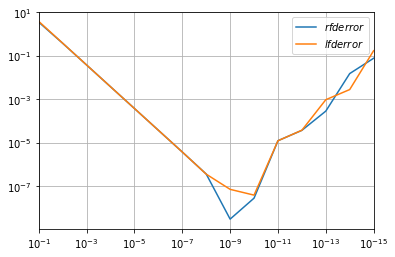

In [5]:
rfd_err = np.array([np.abs(rfd(f, c, h) - df_exact(c)) for h in hs])
lfd_err = np.array([np.abs(lfd(f, c, h) - df_exact(c)) for h in hs])
fig, ax = plt.subplots()
ax.set_xlim(hs[0], hs[-1])
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(hs, rfd_err, label=f"$rfd error$")
ax.plot(hs, lfd_err, label=f"$lfd error$")
ax.legend()
ax.grid(True)
plt.show()

Оптимальный шаг - $h = 10^{-9}$ для первой формулы и $h = 10^{-10}$ для второй

In [6]:
r_h_best = np.argmin(rfd_err)
l_h_best = np.argmin(lfd_err)
print(f'Значение погрешности при шаге h = {hs[r_h_best]} по первой формуле: {rfd_err[r_h_best]}')
print(f'Значение погрешности при шаге h = {hs[l_h_best]} по второй формуле: {rfd_err[l_h_best]}')
print(f'Значение производной при шаге h = {hs[r_h_best]} по первой формуле: {rfd(f, c, hs[r_h_best])}')
print(f'Значение производной при шаге h = {hs[l_h_best]} по второй формуле: {lfd(f, c, hs[l_h_best])}')
print(f'Точное значение производной в точке с = {c}:      f\'(c) = {df_exact(c)}')

Значение погрешности при шаге h = 1e-09 по первой формуле: 3.1223720275974642e-09
Значение погрешности при шаге h = 1e-10 по второй формуле: 2.8753171843476366e-08
Значение производной при шаге h = 1e-09 по первой формуле: 0.4242158063629681
Значение производной при шаге h = 1e-10 по второй формуле: 0.42421584908053367
Точное значение производной в точке с = -2.1:      f'(c) = 0.4242158094853401


In [7]:
print(f'Значение производной с шагом h = {hs[0]} по первой формуле: {rfd(f, c, hs[0])}')
print(f'Значение производной с шагом h = {hs[-1]} по первой формуле: {rfd(f, c, hs[-1])}')
print(f'Значение производной с шагом h = {hs[0]} по второй формуле: {lfd(f, c, hs[0])}')
print(f'Значение производной с шагом h = {hs[-1]} по второй формуле: {lfd(f, c, hs[-1])}')

Значение производной с шагом h = 0.1 по первой формуле: -3.1110471208712562
Значение производной с шагом h = 1e-15 по первой формуле: 0.5019856058607886
Значение производной с шагом h = 0.1 по второй формуле: 4.258679227431206
Значение производной с шагом h = 1e-15 по второй формуле: 0.25131806358213993


In [8]:
print(f'Значение погрешности при шаге h = {hs[0]} по первой формуле: {rfd_err[0]}')
print(f'Значение погрешности при шаге h = {hs[-1]} по первой формуле: {rfd_err[-1]}')
print(f'Значение погрешности при шаге h = {hs[0]} по второй формуле: {lfd_err[0]}')
print(f'Значение погрешности при шаге h = {hs[-1]} по второй формуле: {lfd_err[-1]}')

Значение погрешности при шаге h = 0.1 по первой формуле: 3.5352629303565966
Значение погрешности при шаге h = 1e-15 по первой формуле: 0.07776979637544845
Значение погрешности при шаге h = 0.1 по второй формуле: 3.834463417945866
Значение погрешности при шаге h = 1e-15 по второй формуле: 0.17289774590320017


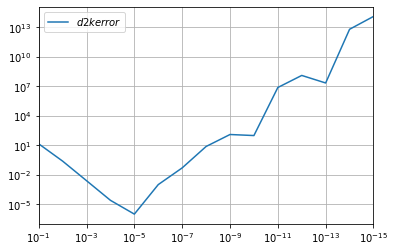

In [9]:
d2k_err = np.array([np.abs(d2k(f, c, h) - d2f_exact(c)) for h in hs])
fig, ax = plt.subplots()
ax.set_xlim(hs[0], hs[-1])
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(hs, d2k_err, label=f"$d2k error$")
ax.legend()
ax.grid(True)
plt.show()

In [10]:
d2k_h_best = np.argmin(d2k_err)
print(f'Точное значение второй производной f\'\'(c) = {d2f_exact(c)}')
print(f'Значение второй производной при шаге h = {hs[d2k_h_best]}: {d2k(f, c, hs[d2k_h_best])}')
print(f'Значение погрешности при шаге h = {hs[d2k_h_best]}: {d2k_err[d2k_h_best]}')
print(f'Значение второй производной при шаге h = {hs[0]}: {d2k(f, c, hs[0])}')
print(f'Значение погрешности при шаге h = {hs[0]}: {d2k_err[0]}')
print(f'Значение второй производной при шаге h = {hs[-1]}: {d2k(f, c, hs[-1])}')
print(f'Значение погрешности при шаге h = {hs[-1]}: {d2k_err[-1]}')

Точное значение второй производной f''(c) = -75.96073123052963
Значение второй производной при шаге h = 1e-05: -75.96073023190263
Значение погрешности при шаге h = 1e-05: 9.986270015360788e-07
Значение второй производной при шаге h = 0.1: -90.05899123571271
Значение погрешности при шаге h = 0.1: 14.098260005183079
Значение второй производной при шаге h = 1e-15: 126851654180804.02
Значение погрешности при шаге h = 1e-15: 126851654180879.97


**Вывод оценки погрешности формулы (2)**

$f(x \pm h) = f(x) \pm h f'(x) + \frac{h^2}{2!}f''(x) \pm \frac{h^3}{3!}f'''(x)...$

$r_-(x) = f'(x) - \frac{f(x) - f(x-h)}{h} = $
$ f'(x) - \frac{f(x) - (f(x) - h f'(x) + \frac{h^2}{2!}f''(\zeta))}{h} = $

$ = f'(x) - \frac{h f'(x) - \frac{h^2}{2!}f''(\zeta)}{h} = \frac{h}{2}f''(\zeta)$

$\left| r_-(x) \right| \leq \frac{1}{2}M_2 h \qquad \text{где} \quad M_2 = \max_{\left[x - h, x\right]} \left| f''(x) \right|$

<style type="text/css">
.tg  {border-collapse:collapse;border-color:#ccc;border-spacing:0;}
.tg td{background-color:#fff;border-color:#ccc;border-style:solid;border-width:1px;color:#333;
  font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{background-color:#f0f0f0;border-color:#ccc;border-style:solid;border-width:1px;color:#333;
  font-family:Arial, sans-serif;font-size:14px;font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-c3ow{border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0pky" colspan="4">Чуворкин Михаил Юрьевич Группа А-13а-19 Вариант 47<br><br>Функция: $f(x) = 2 x \sin^2(3x); \qquad f'(x) = 6x sin(6x) - cos(6x) + 1 \qquad f''(x) = 12 (sin(6 x) + 3 x cos(6 x))$ <br><br>Значения производных: $f'(c) = 0.424216  \qquad f''(c) = -75.9607$<br><br>$$\left(1\right) \quad d1_k = \frac{f(c+h_k) - f(c)}{h_k}$$<br>$$\left(2\right) \quad d1_k = \frac{f(c) - f(c-h_k)}{h_k}$$<br>$$\left(7\right) \quad d^2_k = \frac{2f(c) - 5f(c+h_k) + 4f(c+2h_k) - f(c+3h_k)}{h^2}$$<br></th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-c3ow">$f'(c)$</td>
    <td class="tg-c3ow">Первый результат при шаге $h = 10^{-1}$</td>
    <td class="tg-c3ow">Наилучший результат при шаге <br>$h = 10^{-9} $ для формулы (1)<br>$h = 10^{-10} $ для формулы (2)<br></td>
    <td class="tg-c3ow">Последний результат при шаге $h = 10^{-15}$<br></td>
  </tr>
  <tr>
    <td class="tg-0pky">Формула (1)</td>
    <td class="tg-0pky">$d1_1 = -3.11$<br><br>$\Delta 1_1 = 3.53$<br></td>
    <td class="tg-0pky">$d1_9 = 0.424215806$<br><br>$\Delta 1_9 = 3.12 \times 10^{-9}$</td>
    <td class="tg-0pky">$d1_{15} = 0.5019$<br><br>$\Delta 1_{15} = 0.0777$</td>
  </tr>
  <tr>
    <td class="tg-0pky">Формула (2)</td>
    <td class="tg-0pky">$d1_1 = 4.25$<br><br>$\Delta 1_1 = 3.83$</td>
    <td class="tg-0pky">$d1_{10} = 0.424215849$<br><br>$\Delta 1_{10} = 2.87 \times 10^{-8}$</td>
    <td class="tg-0pky">$d1_{15} = 0.2513$<br><br>$\Delta 1_{15} = 0.1728$</td>
  </tr>
  <tr>
    <td class="tg-c3ow">$f''(c)$<br></td>
    <td class="tg-c3ow">Первый результат при шаге $h = 10^{-1}$</td>
    <td class="tg-c3ow">Наилучший результат при шаге $h = 10^{-5}$</td>
    <td class="tg-c3ow">Последний результат при шаге $h = 10^{-15}$</td>
  </tr>
  <tr>
    <td class="tg-0pky">Формула (7)<br></td>
    <td class="tg-0pky">$d^2_1 = -90.0589 $<br><br>$\Delta 2_1 = 14.0982$</td>
    <td class="tg-0pky">$d^2_5 =-75.9607302 $<br><br>$\Delta 2_5 = 9.98 \times 10^{-7}$<br></td>
    <td class="tg-0pky">$d^2_{15} = 126851654180804.02$<br><br>$\Delta 2_{15} = 126851654180879.97$</td>
  </tr>
</tbody>
</table>

### Задача 6.2. Найти приближенное решение задачи Коши для обыкновенного дифференциального уравнения (ОДУ) 1 порядка с точностью $\varepsilon = 10^{-6}$.

1. Найти аналитическое решение задачи 24 из РЗ.
2. Составить программу вычисления решения методом Эйлера с заданной точностью, используя правило Рунге. Найти решение задачи с точностью $\varepsilon = 10^{-6}$, число точек $N$ и шаг, при котором точность достигается. Построить график решения.
3. Составить программу вычисления решения с заданной точностью методом индивидуального варианта (экстраполяционный метод Адамса второго порядка). Найти решение задачи с заданной точностью, число точек $N$ и шаг, при котором точность достигается. Построить график решения задачи.
4. Сравнить полученные результаты.
5. Оформить отчет по задаче

**Задание 24**: численно решить задачу Коши для обыкновенного дифференциального уравнения 1-го порядка
$$ \begin{cases} y' = f(t, y) \\
                 y(t_0) = y_0
   \end{cases} $$
на отрезке $\left[ t_0, t_0 + 0.8 \right]$ с шагом $h = 0.2$ 

*Вариант 22:* $f(t, y) = y cos(t) + e^{sin (t)}, \qquad t_0 = 0, \qquad y_0 = 1$ 
$$ \begin{cases} y' = y cos(t) + e^{sin (t)} \\
                 y(0) = 1
   \end{cases} $$

**Правило Рунге**
$$y(t_i) - y_i^{h/2} \approx \varepsilon_i^h, \qquad \varepsilon_i^h = \frac{y_i^{h/2}-y_i^h}{2^p -1}$$
где $p$ - порядок метода

**Аналитическое решение:** $y = e^{sin(t)} + t e^{sin(t)}$

In [11]:
t0 = 0
tend = t0 + 0.8
y0 = 1
eps = 1e-6

In [12]:
def fty(t, y):
    return y * np.cos(t) + np.exp(np.sin(t))

def y_exact(t):
    return np.exp(np.sin(t)) + t * np.exp(np.sin(t))

In [13]:
def Euler_with_step(fty, t0, tend, y0, h):
    t = np.arange(t0, tend + h/2, h)
    y = np.zeros(len(t))
    y[0] = y0
    for i in trange(len(t) - 1, desc=f'h={h}', leave=False):
        y[i + 1] = y[i] + h*fty(t[i], y[i])
    return y

def Euler(fty, eps, t0, tend, y0):
    h = 0.1
    yh = Euler_with_step(fty, t0, tend, y0, h)
    h /= 2
    yh2 = Euler_with_step(fty, t0, tend, y0, h)
    while np.max(yh2[::2] - yh) > eps:
        h /= 2
        yh = yh2
        yh2 = Euler_with_step(fty, t0, tend, y0, h)
    return yh2, h

In [14]:
y, h = Euler(fty, eps, t0, tend, y0)
t = np.arange(t0, tend + h, h)
yex = y_exact(t)

h=0.1:   0%|          | 0/8 [00:00<?, ?it/s]

h=0.05:   0%|          | 0/16 [00:00<?, ?it/s]

h=0.025:   0%|          | 0/32 [00:00<?, ?it/s]

h=0.0125:   0%|          | 0/64 [00:00<?, ?it/s]

h=0.00625:   0%|          | 0/128 [00:00<?, ?it/s]

h=0.003125:   0%|          | 0/256 [00:00<?, ?it/s]

h=0.0015625:   0%|          | 0/512 [00:00<?, ?it/s]

h=0.00078125:   0%|          | 0/1024 [00:00<?, ?it/s]

h=0.000390625:   0%|          | 0/2048 [00:00<?, ?it/s]

h=0.0001953125:   0%|          | 0/4096 [00:00<?, ?it/s]

h=9.765625e-05:   0%|          | 0/8192 [00:00<?, ?it/s]

h=4.8828125e-05:   0%|          | 0/16384 [00:00<?, ?it/s]

h=2.44140625e-05:   0%|          | 0/32768 [00:00<?, ?it/s]

h=1.220703125e-05:   0%|          | 0/65536 [00:00<?, ?it/s]

h=6.103515625e-06:   0%|          | 0/131072 [00:00<?, ?it/s]

h=3.0517578125e-06:   0%|          | 0/262144 [00:00<?, ?it/s]

h=1.52587890625e-06:   0%|          | 0/524288 [00:00<?, ?it/s]

h=7.62939453125e-07:   0%|          | 0/1048576 [00:00<?, ?it/s]

h=3.814697265625e-07:   0%|          | 0/2097152 [00:00<?, ?it/s]

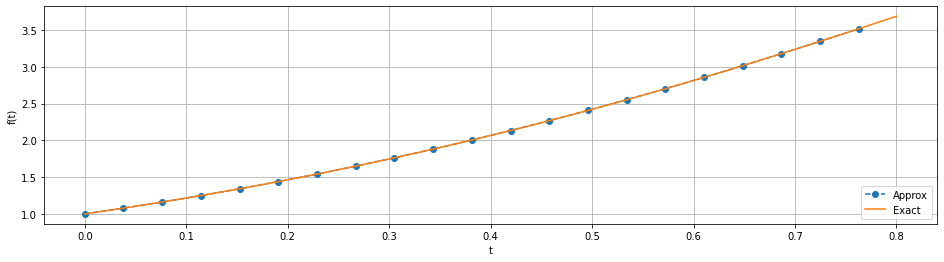

In [15]:
# Чтобы линии на графике не сливались в одну, обозначим приближенное решение точками
fig, ax = plt.subplots(figsize = (16, 4))
sl = 10 ** int(-np.log10(eps) - 1)
ax.plot(t[::sl], y[::sl], 'o--', label='Approx')
ax.plot(t, yex, label='Exact')
ax.set_xlabel('t')
ax.set_ylabel('f(t)')
ax.grid()
ax.legend(loc='lower right')
plt.show()

In [16]:
print(f'Число точек N = {len(t)}')
print(f'Шаг h = {h}')

Число точек N = 2097153
Шаг h = 3.814697265625e-07


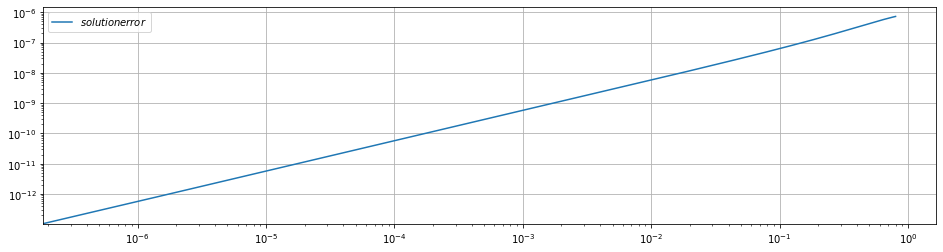

In [17]:
fig, ax = plt.subplots(figsize=(16, 4))
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(t, np.abs(yex - y), label=f"$solution error$")
ax.legend()
ax.grid(True)
plt.show()

In [18]:
def Adams_with_step(fty, t0, tend, y0, h):
    t = np.arange(t0, tend + h/2, h)
    y = np.zeros(len(t))
    y[0] = y0
    y[1] = y[0] + h * fty(t[0] + h/2, y[0] + (h/2) * fty(t[0], y[0]))
    for i in trange(len(t) - 2, desc=f'h={h}', leave=False):
        y[i + 2] = y[i+1] + (h / 2) * (3 * fty(t[i+1], y[i+1]) - fty(t[i], y[i]))
    return y
    
def Adams(fty, eps, t0, tend, y0):
    h = 0.1
    yh = Adams_with_step(fty, t0, tend, y0, h)
    h /= 2
    yh2 = Adams_with_step(fty, t0, tend, y0, h)
    while np.max(  np.abs(yh2[::2] - yh) / 3) > eps:
        h /= 2
        yh = yh2
        yh2 = Adams_with_step(fty, t0, tend, y0, h)
    return yh2, h

In [19]:
y, h = Adams(fty, eps, t0, tend, y0)
t = np.arange(t0, tend + h, h)
yex = y_exact(t)

h=0.1:   0%|          | 0/7 [00:00<?, ?it/s]

h=0.05:   0%|          | 0/15 [00:00<?, ?it/s]

h=0.025:   0%|          | 0/31 [00:00<?, ?it/s]

h=0.0125:   0%|          | 0/63 [00:00<?, ?it/s]

h=0.00625:   0%|          | 0/127 [00:00<?, ?it/s]

h=0.003125:   0%|          | 0/255 [00:00<?, ?it/s]

h=0.0015625:   0%|          | 0/511 [00:00<?, ?it/s]

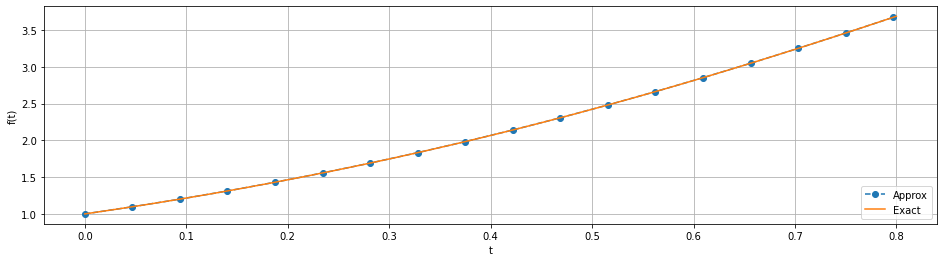

In [20]:
fig, ax = plt.subplots(figsize = (16, 4))
ax.plot(t[::30], y[::30], 'o--', label='Approx')
ax.plot(t, yex, label='Exact')
ax.set_xlabel('t')
ax.set_ylabel('f(t)')
ax.grid()
ax.legend(loc='lower right')
plt.show()

In [21]:
print(f'Число точек N = {len(t)}')
print(f'Шаг h = {h}')

Число точек N = 513
Шаг h = 0.0015625


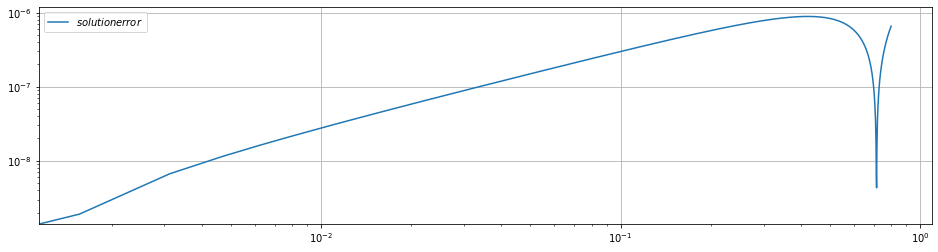

In [22]:
fig, ax = plt.subplots(figsize=(16, 4))
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(t, np.abs(yex - y), label=f"$solution error$")
ax.legend()
ax.grid(True)
plt.show()

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-baqh{text-align:center;vertical-align:top}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0lax">Точность: $\varepsilon = 10^{-6}$<br></th>
    <th class="tg-baqh">Количество точек, $N$</th>
    <th class="tg-baqh">Величина шага, $h$<br></th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0lax">Метод Эйлера<br></td>
    <td class="tg-baqh">$2097153$</td>
    <td class="tg-baqh">$3.814 \times 10^{-7}$</td>
  </tr>
  <tr>
    <td class="tg-0lax">Экстраполяционный метод Адамса 2 порядка<br></td>
    <td class="tg-baqh">$513$</td>
    <td class="tg-baqh">$0.0015625$</td>
  </tr>
</tbody>
</table>